### Submitted By: PARVEJ ALAM M. ANSARI

# Task 1: Web Scraping to Gain Company Insights

---

## Web Scraping and Analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping Data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

## 1. Importing Required Libraries:

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 15 
page_size = 100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class": "review-stats"}):
        for para3 in para2.find_all('td',{'class': 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class': 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class': 'review-rating-header'}):
            category.append(para6.get_text())
            
        # print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 100 total reviews
Scraping page 2


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 200 total reviews
Scraping page 3


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 300 total reviews
Scraping page 4


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 400 total reviews
Scraping page 5


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 500 total reviews
Scraping page 6


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 600 total reviews
Scraping page 7


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 700 total reviews
Scraping page 8


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 800 total reviews
Scraping page 9


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 900 total reviews
Scraping page 10


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 1000 total reviews
Scraping page 11


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 1100 total reviews
Scraping page 12


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)


---> 1200 total reviews
Scraping page 13


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)


---> 1300 total reviews
Scraping page 14


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 1400 total reviews
Scraping page 15


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

---> 1500 total reviews


/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
/tmp/ipykernel_30205/800362351.py:51

In [4]:
# Checking first 10 rows in dataframe:
df.head(10)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,A320,Couple Leisure,Economy Class,London to Munich,September 2023,1.0,3.0,1.0,1.0,1.0,1.0,1,no,✅ Trip Verified | 4/4 flights we booked this ...
1,NaN,Solo Leisure,Economy Class,Frankfurt to London City,September 2023,1.0,NaN,NaN,NaN,1.0,NaN,1,no,✅ Trip Verified | British Airways has a total...
2,A321,Couple Leisure,Business Class,London to Keflavik,August 2023,3.0,4.0,3.0,NaN,4.0,3.0,4,yes,"✅ Trip Verified | London Heathrow to Keflavik,..."
3,Boeing 777-200,Couple Leisure,Business Class,Mumbai to London,August 2023,4.0,3.0,3.0,3.0,4.0,3.0,4,yes,✅ Trip Verified | Mumbai to London Heathrow in...
4,NaN,Business,Premium Economy,Houston to London Heathrow,September 2023,2.0,4.0,3.0,3.0,4.0,NaN,1,no,✅ Trip Verified | Care and support shocking. ...
5,A380,Solo Leisure,Business Class,London to Miami,September 2023,1.0,1.0,2.0,1.0,3.0,NaN,1,no,✅ Trip Verified | Flying A380 business class ...
6,Boeing 777,NaN,Economy Class,Los Angeles to London,August 2023,1.0,1.0,1.0,1.0,1.0,NaN,1,no,✅ Trip Verified | British Airways absolutely ...
7,NaN,Couple Leisure,Economy Class,New York JFK to Malaga via London,June 2023,1.0,3.0,NaN,NaN,1.0,NaN,1,no,✅ Trip Verified | My recent experience with B...
8,NaN,Couple Leisure,Premium Economy,Chicago to Rome via London,July 2023,3.0,1.0,1.0,1.0,1.0,1.0,1,no,✅ Trip Verified | This is to express our disp...
9,A320,Solo Leisure,Business Class,London to Malaga,August 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no,✅ Trip Verified | I flew London to Malaga on ...


In [5]:
# Checking last 10 rows in dataframe:
df.tail(10)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
1490,Boeing 747,Business,Business Class,New York JFK to London Heathrow,July 2017,1.0,1.0,1.0,1.0,2.0,NaN,1,no,✅ Verified Review | New York JFK - London Hea...
1491,A320,Business,Economy Class,Athens to London Heathrow,July 2017,3.0,2.0,1.0,1.0,3.0,NaN,3,yes,✅ Verified Review | A packed flight from Athe...
1492,NaN,Couple Leisure,Economy Class,Venice to Gatwick,July 2017,3.0,1.0,NaN,NaN,1.0,NaN,1,no,✅ Verified Review | Venice to Gatwick. I am d...
1493,NaN,Couple Leisure,Economy Class,New York JFK to Manchester via Heathrow,February 2017,1.0,2.0,2.0,3.0,1.0,NaN,2,no,✅ Verified Review | New York JFK to Mancheste...
1494,Boeing 747-400,Solo Leisure,Economy Class,London to Boston,April 2017,4.0,5.0,5.0,4.0,4.0,NaN,5,yes,✅ Verified Review | After flying Boston to Lo...
1495,NaN,Couple Leisure,Business Class,Naples to Gatwick,July 2017,4.0,3.0,4.0,NaN,3.0,NaN,2,no,✅ Verified Review | Naples to Gatwick. I used...
1496,Boeing 777,Business,Business Class,Toronto to London Heathrow,June 2017,1.0,4.0,1.0,2.0,3.0,NaN,1,no,✅ Verified Review | Toronto to London Heathro...
1497,NaN,Solo Leisure,Economy Class,London to Montreal,June 2017,2.0,2.0,1.0,1.0,3.0,NaN,2,no,✅ Verified Review | London to Montreal. I hav...
1498,A320,Couple Leisure,Business Class,Newcastle to Geneva via London,July 2017,4.0,5.0,4.0,NaN,3.0,NaN,4,yes,✅ Verified Review | Return flights from Newca...
1499,A320,Couple Leisure,Economy Class,London to Keflavik,June 2017,4.0,5.0,5.0,NaN,5.0,NaN,4,yes,✅ Verified Review | London to Keflavik. The B...


In [6]:
# Checking column names:
df.columns

Index(['Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity',
       'Value For Money', 'Recommended', 'reviews'],
      dtype='object')

In [7]:
# Saving collected data in csv format:
df.to_csv("BA_reviews.csv", index=False)

Now we have our dataset for this task! The loops above collected 1500 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [8]:
# Load dataset:
df = pd.read_csv('BA_reviews.csv')

In [9]:
# Checking randomly 5 rows in dataframe:
df.sample(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
577,Boeing 787 / A320,Solo Leisure,Economy Class,Toronto to Geneva via London,January 2020,4.0,5.0,4.0,3.0,4.0,NaN,3,yes,✅ Trip Verified | Toronto to Geneva via Londo...
396,Boeing 787-9,Couple Leisure,Business Class,Atlanta to Belfast via Heathrow,January 2022,4.0,5.0,4.0,4.0,5.0,NaN,5,yes,Not Verified | BA cancelled our original retur...
365,NaN,Couple Leisure,Economy Class,Sydney to Heathrow,March 2022,3.0,1.0,1.0,1.0,2.0,NaN,4,no,Not Verified | Our main complaint is that the...
1453,NaN,Business,Economy Class,London to Warsaw,August 2017,2.0,3.0,1.0,1.0,3.0,NaN,1,no,✅ Verified Review | London to Warsaw. I have ...
1105,Boeing 787(9),Couple Leisure,Business Class,Seychelles to London,June 2018,2.0,3.0,3.0,3.0,1.0,NaN,1,no,✅ Trip Verified | When you travel British Airw...


In [10]:
# Size of dataset:
df.shape

(1500, 14)

In [11]:
# Checking only review column:
df['reviews'].head()

0    ✅ Trip Verified |  4/4 flights we booked this ...
1    ✅ Trip Verified |  British Airways has a total...
2    ✅ Trip Verified | London Heathrow to Keflavik,...
3    ✅ Trip Verified | Mumbai to London Heathrow in...
4    ✅ Trip Verified |  Care and support shocking. ...
Name: reviews, dtype: object

In [12]:
# Number of (rows) Reviews Scraped from website:
df['reviews'].shape

(1500,)

In [13]:
# Checking null values in review column.
df['reviews'].isnull().sum()

0

In [14]:
# Checking duplicates in review column:
df['reviews'].duplicated().sum()

0

### Observation:
- From above it is good to observe that review column contains no null values. Further more, it has no duplicated values.

## 2. Data Cleaning [Preprocessing]:

In [15]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

/tmp/ipykernel_30205/422421243.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(j,'')


## 3. Data Visualization:

#### About Word Cloud:
- A word cloud is a visual representation (image) of word data. In other words, it is a collection, or cluster, of words depicted in different sizes. 
- The bigger and bolder the word appears, the more often it's mentioned within a given text and the more important it is.

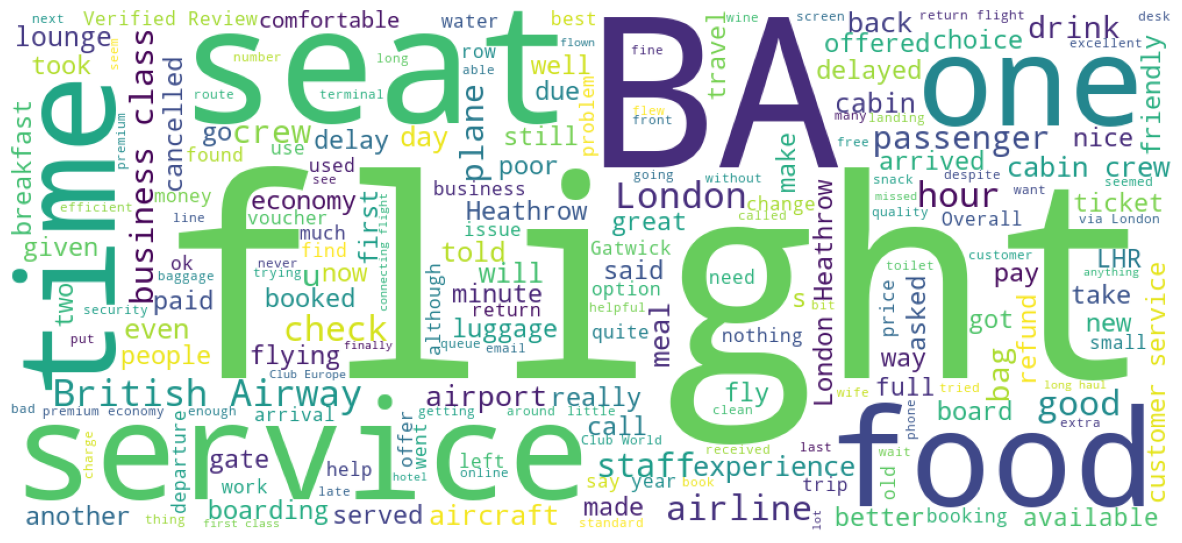

In [16]:
review_word = []

for i in df['reviews']:
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

### Observation:
- From the above wordcloud, it can be seen that th key of topics in customer reviews are flight, seat, food, service and time. 
- Showing that people are actively talking about their experience on the plane and the staff regarding the above topics.
- Let's try to analyse these buzz words:

## Customer Satisfaction

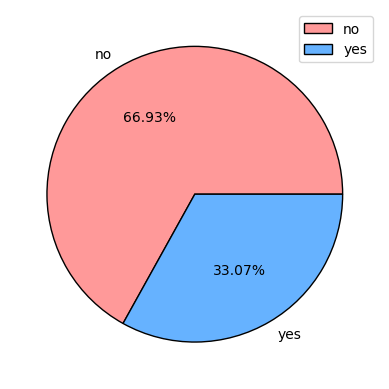

In [18]:
# Custom color palette
custom_colors = ['#FF9999', '#66B2FF']  # Replace with your desired colors

# Grouping and pie chart
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels=soc['Recommended'], autopct='%.2f%%', colors=custom_colors,
        wedgeprops={"edgecolor": "k"})
plt.legend()
plt.show()

### Observation:
- From the above pie chart, it is seen that almost 67 % of passengers are dissatisfied with British Airways services.
- Let's further breakdown the data to find out what make passengers dissatisfied :

## Descriptive Analysis of British Airways Rating by Dissatisfied Passengers:

In [19]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,915.000000,904.000000,749.000000,533.000000,944.000000,261.000000,1004.000000
mean,2.076503,2.379425,1.805073,2.048780,1.974576,1.459770,1.609562
std,1.066008,1.318098,1.029992,1.163941,1.198882,0.954398,0.873304
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Observation:
- From the above descriptive statistics, following keypoints cane be observed.
1. Customer services like Seat Comfort, Cabin Staff Service, Inflight Entertainment have got **< 3 out of 5 average rating** from passengers.
2. Further, Customer services like Food & Beverages, Ground Service, Wifi & Connectivity, Value For Money have got **< 2 out of 5 average rating** from passengers.

In [20]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe(include=object)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,reviews
count,477,1002,1004,1001,1004,1004,1004
unique,67,4,4,670,79,1,1004
top,A320,Couple Leisure,Economy Class,London to Athens,August 2017,no,| 4/4 flights we booked this holiday were de...
freq,104,321,595,9,33,1004,1


## Analysis of Food Services Provided by British Airways

In [21]:
data = df_soc[df_soc['reviews'].str.contains('food | drink')]
data['reviews'].to_csv('test.csv')

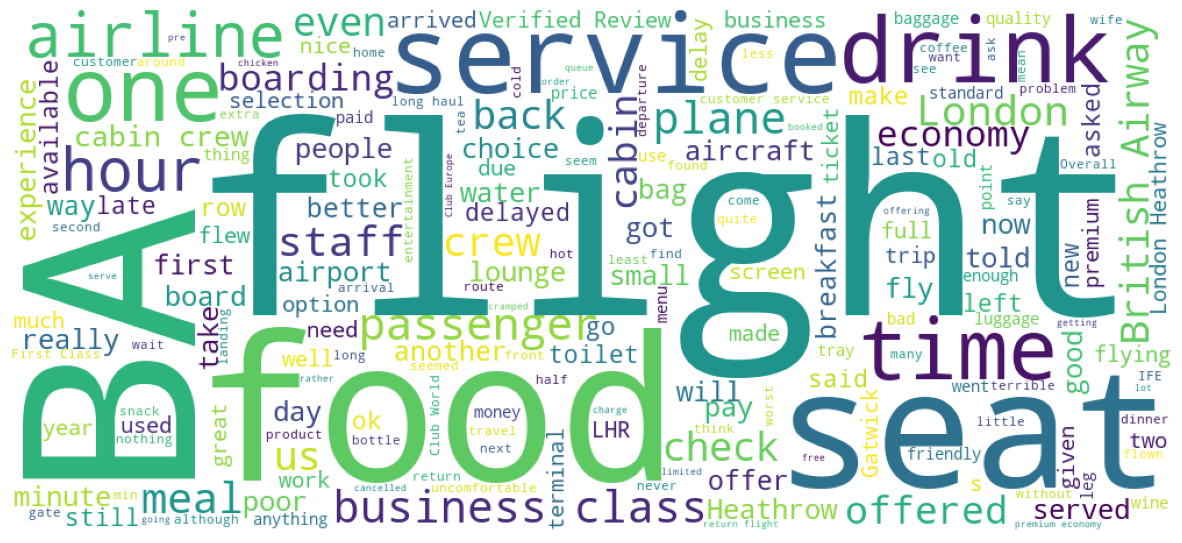

In [22]:
review_word = []

for i in data['reviews']:
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

### Observation:
- After analysing the test.csv file, got following insights:

1. Time to deliver the order is too long
2. For free catering just bottle of water and a packet of crisps
3. Minimal selection of food items for purchase.

## Analysis of Value for Money:

In [23]:
data = df_soc[df_soc['reviews'].str.contains('money | refund & value')]
data['reviews'].to_csv('test2.csv')

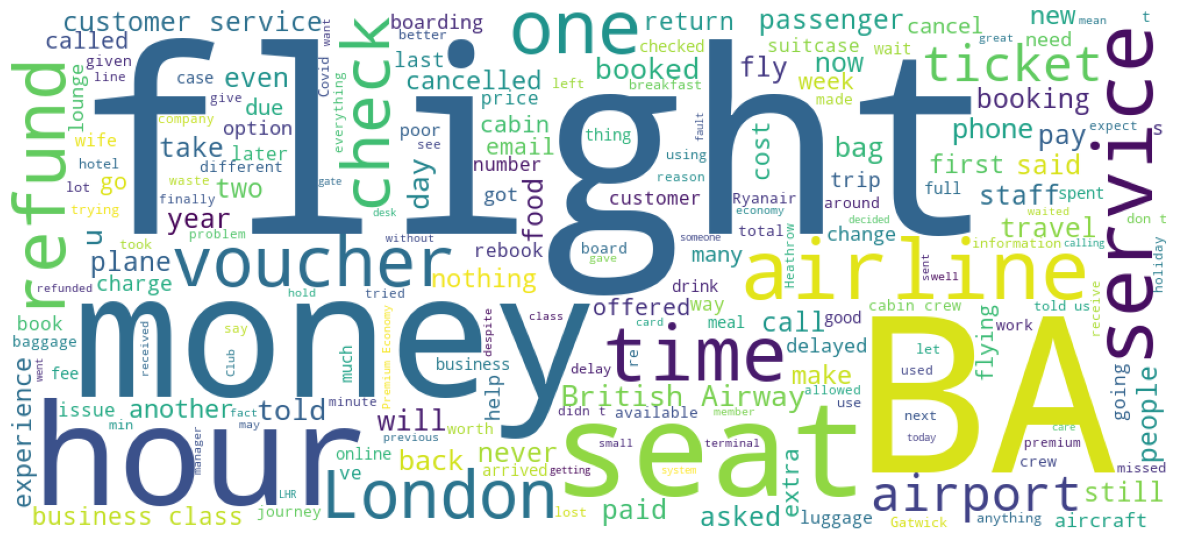

In [24]:
review_word = []

for i in data['reviews']:
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

### Observation:
- After analysing the test.csv file, got following insights:

1. The refund take a lot of time
2. Forced to use of vouchers however it was useless
3. Long delay time